In [86]:
# Analysis wheter or not the numerical solvers will converge toward the origin when μ<1 

In [1]:
using Plots
using LinearAlgebra
using DifferentialEquations
using Random

In [2]:
include("euler_method.jl")
include("DTM.jl")
include("lorentz_system.jl")
include("RK4.jl")

RK4 (generic function with 2 methods)

In [3]:
## parameter values
θ = 10.0; β = 8/3; μ = 1/2 # μ<1
tim = 1000
Δt = 0.001
r_vals = [100 250 500 750 1000]

1×5 Matrix{Int64}:
 100  250  500  750  1000

In [71]:
# Points on sphere

function Points_on_Sphere(nr_of_dots, r)
    dots = zeros(3, nr_of_dots)
    for i=1:nr_of_dots
        dot = rand(-1.0:0.001:1.0,(1,3))
        dot = r*dot./norm(dot)
        dots[:,i] = dot
    end
    return dots
end

Points_on_Sphere (generic function with 1 method)

In [58]:
# Percentage of converging dots

function Percentage_of_Convergence(r_vals, θ, μ, β, nr_of_dots, ẋ::Function, Δt::Float64)

    for r in r_vals

        dots = Points_on_Sphere(nr_of_dots, r)

        conv = zeros(nr_of_dots)
        tol = 0.1
        for i=1:nr_of_dots
            x̄=dots[:,i]
            while norm(x̄) > tol && norm(x̄) < 1000*r
                x̄=ẋ([θ,μ,β],x̄,Δt)
            end
            if norm(x̄) <= tol
                conv[i] = 1
            else 
                conv[i] = 0
            end
        end
        print(" & ", sum(conv)/nr_of_dots)
    end
end



Percentage_of_Convergence (generic function with 2 methods)

In [67]:
r_vals = [100 250 500 750 1000]
Δt = 0.01
println(" \n Euler Forward \n ")
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, EulerForward,Δt)
println(" \n Runge-Kutta 4 \n")
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, RK4,Δt)
println("\n DTM \n")
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, DTM,Δt)

 
 Euler Forward 
 


 & 0.072

 & 0.0003 & 0.0 & 0.0

 & 0.0 
 Runge-Kutta 4 



 & 1.0

 & 1.0

 & 0.7722

 & 0.4072

 & 0.2692
 DTM 



 & 1.0

 & 1.0

 & 0.3867

 & 0.2082

 & 0.1261

In [60]:
Δt = 0.001
r_vals = [250 500 1000 2500 5000 7500 10000]
println(" \n Euler Forward \n ")
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, EulerForward,Δt)
println(" \n Runge-Kutta 4 \n")
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, RK4,Δt)
println("\n DTM \n")
Percentage_of_Convergence(r_vals, θ, μ, β, 10000, DTM,Δt)

 
 Euler Forward 
 


InterruptException: InterruptException:

In [75]:
# Finds path for starting position x̄₀
function Path(ẋ::Function, Δt, tim, x̄₀, p)
    tsteps = Int(tim/Δt)
    x̄=x̄₀
    X = zeros(3,tsteps)
    for i=1:tsteps
        x̄= ẋ(p,x̄,Δt)
        X[:,i] = x̄
    end
    return X
end

Path (generic function with 1 method)

In [83]:
function Plot_Converging_Points(ẋ::Function, Δt, r, tim, p)
    nr_of_dots = 10
    dots = Points_on_Sphere(nr_of_dots, r)
    X_all_paths = zeros(nr_of_dots,3,Int(tim/Δt))
    for i=1:nr_of_dots
        x̄₀ = dots[:,i]
        X_all_paths[i,:,:] = Path(ẋ, Δt, tim, x̄₀, p)
    end

    plot(X_all_paths[1,1,:],X_all_paths[1,2,:],X_all_paths[1,3,:],legend=:bottomright)
    plot!(X_all_paths[2,1,:],X_all_paths[2,2,:],X_all_paths[2,3,:],legend=:bottomright)
    plot!(X_all_paths[3,1,:],X_all_paths[3,2,:],X_all_paths[3,3,:],legend=:bottomright)
    plot!(X_all_paths[4,1,:],X_all_paths[4,2,:],X_all_paths[4,3,:],legend=:bottomright)
    plot!(X_all_paths[5,1,:],X_all_paths[5,2,:],X_all_paths[5,3,:],legend=:bottomright)
    plot!(X_all_paths[6,1,:],X_all_paths[6,2,:],X_all_paths[6,3,:],legend=:bottomright)
    plot!(X_all_paths[7,1,:],X_all_paths[7,2,:],X_all_paths[7,3,:],legend=:bottomright)
    plot!(X_all_paths[8,1,:],X_all_paths[8,2,:],X_all_paths[8,3,:],legend=:bottomright)
    plot!(X_all_paths[9,1,:],X_all_paths[9,2,:],X_all_paths[9,3,:],legend=:bottomright)
    plot!(X_all_paths[10,1,:],X_all_paths[10,2,:],X_all_paths[10,3,:],legend=:bottomright)
    
end

Plot_Converging_Points (generic function with 2 methods)

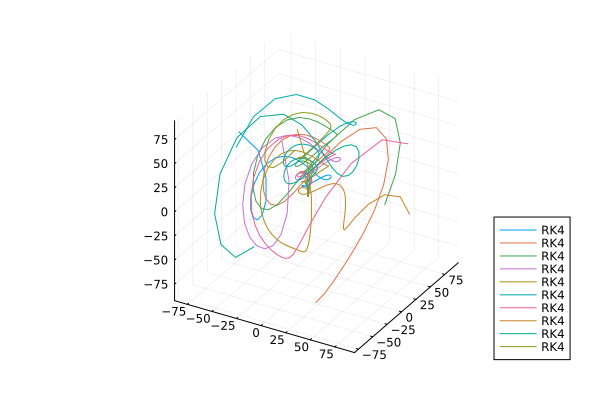

In [87]:
Δt = 0.01
r = 100
tim = 1000
Plot_Converging_Points(RK4, Δt, r, tim, [θ,μ,β])

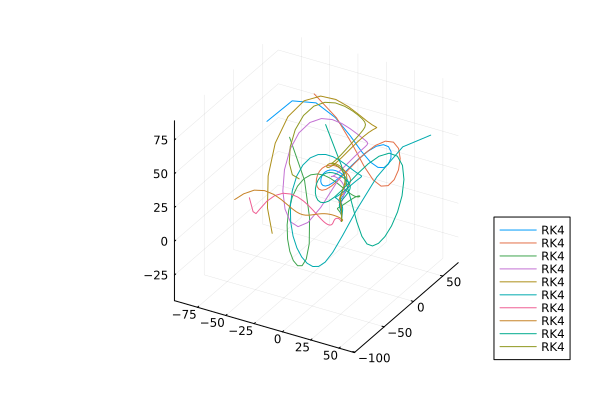

In [88]:
Plot_Converging_Points(DTM, Δt, r, tim, [θ,μ,β])

In [110]:
# Percentage of converging dots for preexisting solvers

function Percentage_of_Convergence_Preex(r_vals, θ, μ, β, nr_of_dots, ẋ, Δt::Float64)

    for r in r_vals

        dots = Points_on_Sphere(nr_of_dots, r)

        conv = zeros(nr_of_dots)
        tol = 0.1
        for i=1:nr_of_dots
            x̄=dots[:,i]
            prob = ODEProblem(LorentzSystem,x̄,(0.0,r),[θ,μ,β])
            sol = solve(prob, ẋ, dt=Δt)
            if norm(sol[end]) <= tol
                conv[i] = 1
            else 
                println(sol[end])
                conv[i] = 0
            end
        end
        print(" & ", sum(conv)/nr_of_dots)
    end
end

Percentage_of_Convergence_Preex (generic function with 2 methods)

In [111]:
# Preexisting Julia Solver
Δt = 0.001
#r_vals = [250 500 1000 2500 5000 7500 10000]
r_vals = [50000]
nr_of_dots = 10
Percentage_of_Convergence_Preex(r_vals, θ, μ, β, nr_of_dots, Vern9(), Δt)

[-30038.39317787387, 39710.32970465028, 4559.018539053197]


┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/00eila01/.julia/packages/SciMLBase/QqtZA/src/integrator_interface.jl:525


[-42373.443406981496, -637.1946376989699, -26534.605269892814]
[-46892.56267045653, -13578.927414224863, 10802.791142872225]
[-20609.809957381014, 36752.284058790545, 26916.63704816427]


┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/00eila01/.julia/packages/SciMLBase/QqtZA/src/integrator_interface.jl:525
┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/00eila01/.julia/packages/SciMLBase/QqtZA/src/integrator_interface.jl:525
┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/00eila01/.julia/packages/SciMLBase/QqtZA/src/integrator_interface.jl:525


 & 0.6